<h1>NetworkX Exercise


Importing necessary libraries for the assignment

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import pydot as pt
import pygraphviz as pgv
import sys
import matplotlib.pyplot as plt

<h2> QUESTION A
<h3> Correlation matrix

I have used pandas library to load the CSV file as pandas DataFrame object.

In [2]:
df = pd.read_csv("HW1_asset_prices.csv")

I have calculated correlation matrix from given asset prices, with **corr()** function of pandas library, and assign it to a variable called **correlation**.

In [3]:
correlation = df.corr() 
correlation.head()

,EOD~BND.11,EOD~DBC.11,EOD~DIA.11,EOD~EEM.11,EOD~EFA.11,EOD~EMB.11,EOD~EPP.11,EOD~EWG.11,EOD~EWI.11,EOD~EWJ.11,...,EOD~VGK.11,EOD~VPL.11,EOD~VXX.11,EOD~XLB.11,EOD~XLE.11,EOD~XLF.11,EOD~XLK.11,EOD~XLU.11,EOD~CSJ.11,EOD~FXF.11
EOD~BND.11,1.000000,-0.822062,0.794479,0.069905,0.114368,0.912854,0.119582,0.099310,-0.482615,0.638039,...,-0.037230,0.536324,-0.900317,0.597031,-0.613705,0.689425,0.845532,0.941027,0.934951,-0.769985
EOD~DBC.11,-0.822062,1.000000,-0.574282,0.349666,0.200079,-0.600426,0.325952,0.228763,0.600429,-0.472528,...,0.333239,-0.215966,0.773717,-0.238640,0.895370,-0.509694,-0.644009,-0.717165,-0.713552,0.870505
EOD~DIA.11,0.794479,-0.574282,1.000000,0.468724,0.563945,0.917934,0.519725,0.568437,-0.070294,0.897045,...,0.412195,0.875397,-0.883305,0.898652,-0.346392,0.975872,0.988677,0.910599,0.917660,-0.657030
EOD~EEM.11,0.069905,0.349666,0.468724,1.000000,0.906563,0.383581,0.968244,0.871560,0.609441,0.553773,...,0.872187,0.788827,-0.162012,0.743330,0.522937,0.488016,0.403966,0.239615,0.227668,0.224999
EOD~EFA.11,0.114368,0.200079,0.563945,0.906563,1.000000,0.412868,0.881808,0.961832,0.722791,0.701312,...,0.975473,0.852729,-0.274274,0.759922,0.333035,0.596364,0.504831,0.291689,0.308123,0.135446


Next, I have transformed our correlation matrix, from DataFrame object into numpy matrix array.

In [4]:
correlation_matrix = np.asmatrix(correlation)

We can see that **correlation_matrix** variable is a matrix with calculated asset correlation coefficients.

In [5]:
correlation_matrix

matrix([[ 1.        , -0.82206194,  0.7944792 , ...,  0.94102682,
          0.93495058, -0.76998484],
        [-0.82206194,  1.        , -0.5742816 , ..., -0.71716539,
         -0.71355201,  0.87050482],
        [ 0.7944792 , -0.5742816 ,  1.        , ...,  0.91059853,
          0.91766044, -0.65703029],
        ...,
        [ 0.94102682, -0.71716539,  0.91059853, ...,  1.        ,
          0.96040775, -0.72589881],
        [ 0.93495058, -0.71355201,  0.91766044, ...,  0.96040775,
          1.        , -0.72806496],
        [-0.76998484,  0.87050482, -0.65703029, ..., -0.72589881,
         -0.72806496,  1.        ]])

<h2> QUESTION B
<h3> Graph of correlated assets </h3>
<br>
<p style='text-align: justify;'>In this task I have created a graph with chosen layout settings, which in my opinion was the best fir for this kind of dataset.  Under the graph, I have placed explanation of the choice. On the graph assets are represented as nodes, and connection between assets are shown with lines.

First, I have created a networkx graph object from our correlation matrix (numpy matrix array object).

In [6]:
G = nx.from_numpy_matrix(correlation_matrix)

<p style='text-align: justify;'>Next, I have assigned the names for different assets, which will be later useful for labeling the nodes in our graph. I have deleted prefix for all assets **EOD~**, as I have found it irrelevant.

In [7]:
assets_names = correlation.index.values
assets_names = [x[-6:] for x in assets_names]              

I have relabeled node names, from numbers (as networkx graph object stores it) to earlier prepared assets names.

In [8]:
G = nx.relabel_nodes(G, lambda x: assets_names[x])

I have created a function to display graph using personalized settings, in order for the graph to be visually readable.

In [9]:
def display(graph):

    plt.subplots(figsize=(20, 20))
    
    # Setting layout
    layout = nx.circular_layout(graph)
    
    #Nodes drawing
    nx.draw_networkx_nodes(graph, pos=layout, node_color='red', node_size=700, alpha=0.9)
    
    #Edges drawing
    nx.draw_networkx_edges(graph, pos=layout, edge_color='grey', alpha=0.5)
    
    #Label styling
    nx.draw_networkx_labels(graph, pos=layout, font_size=12, font_weight='bold')
    
    plt.show()

Thanks to the created function, called **display**, I can reproduce graph structure with given settings and given data.

C:\Users\Longin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:517: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

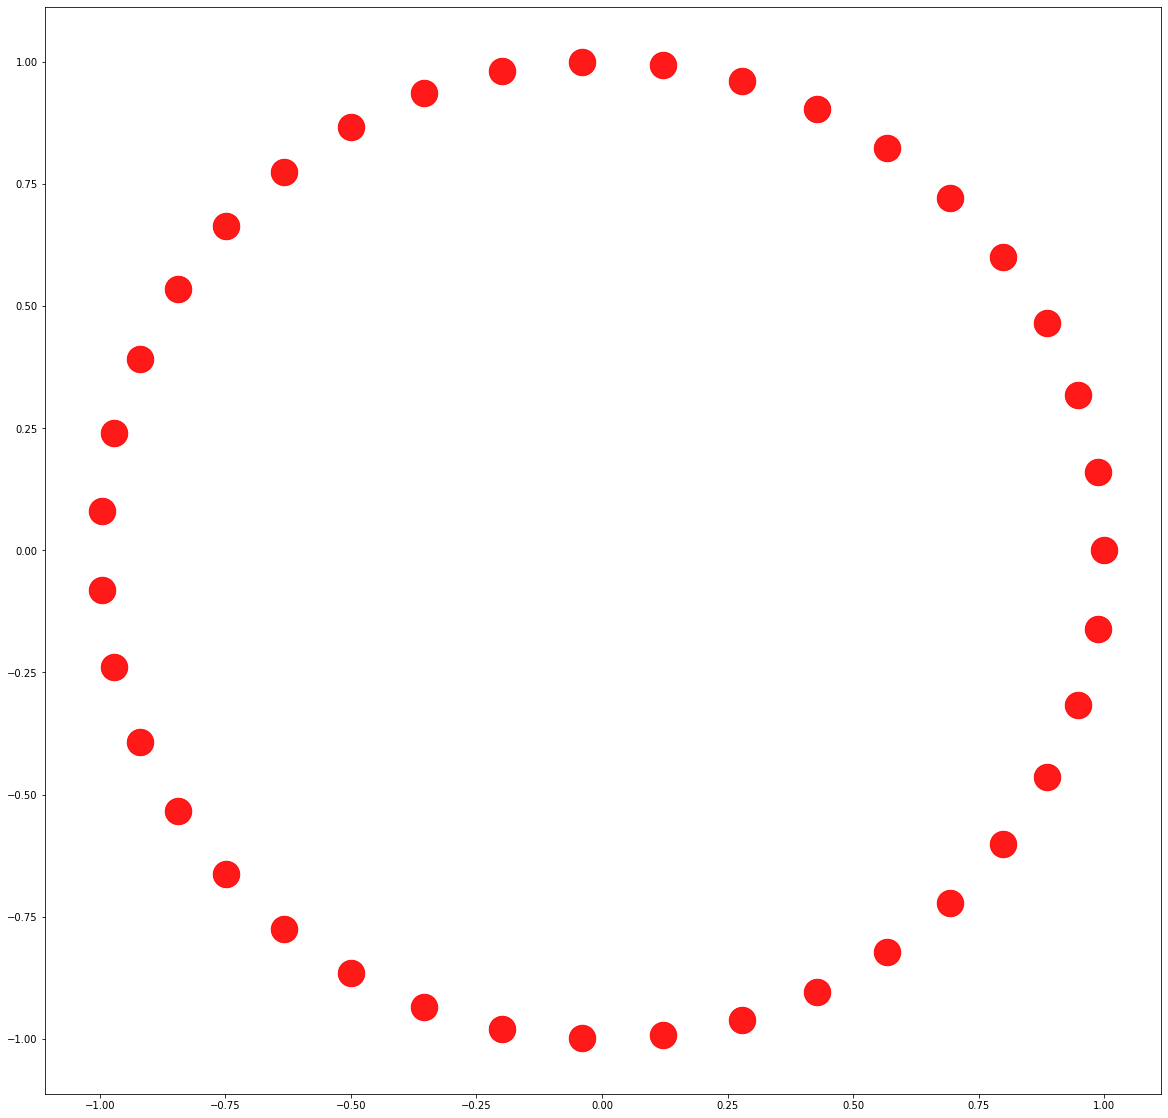

In [10]:
display(G)


**WHY THIS LAYOUT?**<br>
<p style='text-align: justify;'>I have chosen circular layout. As every asset is connected to every asset and we do not represent the weight of edges at this point, the most convenient way is to set the graph in a circular shape. with even distances between each node, so we could have a regular mesh, improving the visibility (in comparison to other reviewed layouts). Nodes are distributed evenly, over the circle shape (with equal distances between each other) what makes every node visible, they do not overlap. Moreover, nodes connected to each other present regular symmetric mesh. We could spot easily every node. Paths between nodes (edges) are much easier to track in circular shape than in other settings, they do not overlap. It is still a challenge to follow and distinguish edges due to exact same width of every edge, but when we compliment our graph with additional information - width of edges on the basis of their weights, our graph will become much clearer.

<h2> QUESTION C </h2><br>
<p style='text-align: justify;'>I have done this task in two steps. First step was to create a graph, based on previous *display* function, but adding information about weight of edges from the correlation matrix. Next step would be adjusting size of the nodes to a particular criterion.
<h3>Part 1 </h3><br>
Creating a graph with coefficients from correlation matrix as edges' widths. 

In [ ]:
def display_weights(graph):

    plt.subplots(figsize=(20, 20))
    
    # Setting layout
    layout = nx.circular_layout(graph)
    
    # Creating a list of weights
    edges_weights = graph.edges(data=True)
    weights=[]
    for a, b, c in edges_weights:
        weights.append(c['weight'])
    
    # Setting weights width size
    weights = ([x**12 for x in weights])
    

    #Nodes drawing
    nx.draw_networkx_nodes(graph, pos=layout, node_color='red', node_size=800, alpha=0.8)
    
    #Edges drawing
    nx.draw_networkx_edges(graph, pos=layout, width=weights, edge_color='grey', alpha=0.7)
    
    #Label styling
    nx.draw_networkx_labels(graph, pos=layout, font_size=12, font_weight='bold')
    
    plt.show()

<p style='text-align: justify;'>I had to adjust the weights of the edges, because the values from the correlation matrix were not sufficient to visualize properly the thickness (too small values). Therefore, I had to rescale the weights raising them to the power of 12, which in result made small values smaller, so some edges are barely visible. Nevertheless, it helped me to make a differentiation between edges, so we have clearer picture.

In [ ]:
display_weights(G)

<h3> Part 2 </h3>
<p style='text-align: justify;'>As we clearly understand nodes in our undirected graph have all similar degree (they are connected all together between each other - degree 39). Therefore, differentiating nodes on the basis would not give us any result. We have to found another criterion, which will allow us to distinct between the node sizes.<br>

There are several criteria we could use: **threshold, positive, negative**.

<br>**Threshold**<br>
<p style='text-align: justify;'>Here, we could use arbitrary chosen threshold for the correlation matrix values. Let us assume we are only interested in strong correlations, and by strong correlation in finance, we commonly understand correlation coefficients greater than 0.8 (in absolute number, for both positive and negative values). Therefore, we will create a function, where we will add all edges above the chosen value of the threshold to the newly created graph, called T. Later on the basis of edges, which remained, we will calculate degree for each node and adjust its size accordingly to its degree.




First let us create graph T with edges corresponding to correlation coefficient above 0.7.

In [ ]:
# New empty graph T
T = nx.Graph() 
    
# Adding edges above 0.7 threshold to the graph T
edges_weights = G.edges(data=True)
    
for a, b, c in edges_weights:
    if abs(c['weight'])>=0.7:
        
        # We are adding edges above our threshold, from graph G to graph T
        T.add_edge(a, b)
        
        # We are adding weights, corresponding to edges (a,b), above our threshold, from graph G to graph T
        T[a][b]['weight']=abs(c['weight'])      

Let us look at graph T.

In [ ]:
display_weights(T)

<p style='text-align: justify;'> 
We can see that our graph T contains only edges with weights above set threshold, in our case 0.7. We can spot as well that in the graph, nodes have different degrees than in graph G (where all nodes have the same degree). Let us assign variable node_degrees to the dictionary, with assets as keys and degrees as values.

In [ ]:
node_degrees = dict(T.degree())

node_degrees

Having our list of node sizes, we have to create a list, which will be readable by parameter **node_size** in networkx library function: <br>**draw_networkx_nodes(... node_size= ...)**. We will rescale the size of nodes in order to obtain a visually informative graph.

In [ ]:
node_sizes = [node**2.7 for node in node_degrees.values()]

Now we are ready to place the **node_sizes** list modifying our function **display_weights()**.

In [ ]:
def display_node_sizes(graph):

    plt.subplots(figsize=(20, 20))
    
    # Setting layout
    layout = nx.circular_layout(graph)
    
    # Creating a list of weights
    edges_weights = graph.edges(data=True)
    
    weights=[]
    for a, b, c in edges_weights:
        weights.append(c['weight'])
    
    # Setting weights width size
    weights = ([x**12 for x in weights])
       
    #Nodes drawing
    nx.draw_networkx_nodes(graph, pos=layout, node_color='red', node_size=node_sizes, alpha=0.8)
    
    #Edges drawing
    nx.draw_networkx_edges(graph, pos=layout, width=weights, edge_color='grey', alpha=1)
    
    #Label styling
    nx.draw_networkx_labels(graph, pos=layout, font_size=12, font_weight='bold')
    
    plt.show()

display_node_sizes(T)

<p style='text-align: justify;'>We have obtained visually informative graph. Nodes sizes depends on their degrees, so we can clearly see that the bigger the node the more edges it has, whereas small-sized nodes are barely visible.

**General function** <br>
I have prepared general function for creating such graphs, including different parameters useful for adjusting the graph.

In [ ]:
def display_all(graph, threshold, edge_scale, node_scale):

    plt.subplots(figsize=(20, 20))
    
    # New empty graph S
    S = nx.Graph() 

    edges_weights = graph.edges(data=True)
    for a, b, c in edges_weights:
        if abs(c['weight'])>=threshold:
            S.add_edge(a, b)
            S[a][b]['weight']=abs(c['weight'])  
    
    # Setting node size
    node_sizes = [node**node_scale for node in dict(S.degree()).values()]

    # Creating a list of weights
    edges_weights_S = S.edges(data=True)
    
    weights=[]
    for c,d,e in edges_weights_S:
        weights.append(e['weight'])
    
    # Setting weights width size
    weights = ([x**edge_scale for x in weights])
       
    # Setting layout
    layout = nx.circular_layout(S)
    
    #Nodes drawing
    nx.draw_networkx_nodes(S, pos=layout, node_color='red', node_size=node_sizes, alpha=0.8)
    
    #Edges drawing
    nx.draw_networkx_edges(S, pos=layout, width=weights, edge_color='grey')
    
    #Label styling
    nx.draw_networkx_labels(S, pos=layout, font_size=12, font_weight='bold')
    
    plt.show()

display_all(G,0.7,12,2.7)

<p style='text-align: justify;'>As we can see the result graph is the same as the graph T created manually before, so the function works properly. Now we can use our function attributes to modify the settings as the threshold, node/edge scaling to obtain optimal visual results. 

<h2> BONUS ANSWERS 

<h3>Using Pygraphviz library layout function to draw the graph

In [ ]:
def display_using_graphviz(graph):

    plt.subplots(figsize=(20, 20))
    
    # Setting layout with added GRAPHVIZ function
    layout = nx.nx_agraph.graphviz_layout(G, prog='twopi')
    
    #Nodes drawing
    nx.draw_networkx_nodes(graph, pos=layout, node_color='red', node_size=800, alpha=0.9)
    
    #Edges drawing
    nx.draw_networkx_edges(graph, pos=layout, edge_color='blue', alpha=0.5)
    
    #Label styling
    nx.draw_networkx_labels(graph, pos=layout, font_size=12, font_color='black', font_family='sans-serif', font_weight='bold')
    
    #Displaying the graph figure
    plt.show()
    
display_using_graphviz(T)

<h3>Using Pydot library layout function to draw the graph

In [ ]:
def display_using_pydot(graph):

    plt.subplots(figsize=(20, 20))
    
    # Setting layout with added PYDOT function
    layout = nx.nx_pydot.pydot_layout(graph, prog='dot')
    
    #Nodes drawing
    nx.draw_networkx_nodes(graph, pos=layout, node_color='red', node_size=800, alpha=0.9)
    
    #Edges drawing
    nx.draw_networkx_edges(graph, pos=layout, edge_color='blue', alpha=0.5)
    
    #Label styling
    nx.draw_networkx_labels(graph, pos=layout, font_size=12, font_color='black', font_family='sans-serif', font_weight='bold')
    
    #Displaying the graph figure
    plt.show()

display_using_pydot(T)

**USING SEABORN LIBRARY TO CREATE A HEATMAP** <br>
Additionaly, I have used Seaborn library to visualize correlation matrix as a heatmap. Positive correlation coefficients are presented with warmer colors (from red up to white spectrum) and negative correlation coefficient is presented with dark spectrum (from red to black colors). With the given picture we can find the patterns by color, which for human eye is more distinguishable than the networks itself. Although I think both methods compliment each other to spot the patterns, so to better understand the situation in the dataset.

In [ ]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,15)) 

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)